In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import functions as myfunc

In [2]:
nodes = np.loadtxt("Lösung/Netz1D_p.dat")
number_of_nodes = len(nodes)
element_indices = np.loadtxt("Lösung/Elemente1D_t.dat")

coefficients_matrix = np.loadtxt("Lösung/Netz1D_Matrix_K.dat")
rhs_matrix = np.loadtxt("Lösung/Netz1D_Vector_D.dat").reshape((number_of_nodes, 1))

def alpha(x):
    """
    Piecewise function for alpha(x):
    - 3 in [1.5, 2.7]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1.5 <= x) & (x <= 2.7), 3.0, np.square(x))

def beta(x):
    """
    Piecewise function for beta(x):
    - x / (x+1) in [1, 2]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1 <= x) & (x <= 2), x / (x + 1), np.square(x))

def rhs(x):
    """
    Right-hand side f(x):
    - x in [2, 4]
    - x + 1 elsewhere
    """
    x = np.asarray(x)
    return np.where((2 <= x) & (x <= 4), x, x + 1)

def gamma(x):
    """
    Robin issue function gamma(x)"""
    return x

def rho(x):
    """
    Robin issue function rhs rho(x)
    """
    x = np.asarray(x)
    return np.power(x, 3)

In [3]:
DOMAIN_BOUNDARY = {
    "Lower Bound": 1,
    "Upper Bound": 4
}
BOUNDARY_CONDITION = {
    "Lower Bound": {
        "x": DOMAIN_BOUNDARY["Lower Bound"],
        "Gamma": gamma(DOMAIN_BOUNDARY["Lower Bound"]),
        "Rho": rho(DOMAIN_BOUNDARY["Lower Bound"])
    },
    "Upper Bound": {
        "x": DOMAIN_BOUNDARY["Upper Bound"],
        "Gamma": gamma(DOMAIN_BOUNDARY["Upper Bound"]),
        "Rho": rho(DOMAIN_BOUNDARY["Upper Bound"])
    }
}

BOUNDARY_CONDITION["Lower Bound"]["x Index"] = np.where(np.isclose(nodes, BOUNDARY_CONDITION["Lower Bound"]["x"]))[0][0]
BOUNDARY_CONDITION["Upper Bound"]["x Index"] =np.where(np.isclose(nodes, BOUNDARY_CONDITION["Upper Bound"]["x"]))[0][0]

In [4]:
coefficients_matrix, rhs_matrix = myfunc.add_robin_issue_values(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION)

In [5]:
solution = myfunc.solve_leq(coefficients_matrix, rhs_matrix)
print(solution)

[[1.77829747]
 [1.79162907]
 [1.78426219]
 [1.7669693 ]
 [2.3644194 ]
 [1.73509764]
 [1.76259668]
 [1.7841724 ]
 [1.81724114]
 [1.78927665]
 [1.78682656]
 [3.44251607]
 [1.70606554]
 [1.82415213]
 [1.77761928]
 [1.82573762]
 [2.11450273]
 [1.81284246]
 [1.77721158]
 [3.26955931]
 [1.96470155]
 [3.92890988]
 [1.70783415]
 [3.23956791]
 [2.75891394]
 [1.81300832]
 [1.82466826]
 [1.78277258]
 [1.96023956]
 [3.12391654]
 [2.54313063]
 [1.81166767]
 [1.82324932]
 [1.7557817 ]
 [1.80712916]
 [1.82160299]
 [1.74623567]
 [1.81585638]
 [2.62080948]
 [1.8092673 ]
 [1.77693599]
 [1.81752135]
 [2.93747214]
 [1.85147756]
 [1.77227669]
 [1.75462619]
 [4.13349437]
 [3.3939784 ]
 [1.81120435]
 [2.2390002 ]
 [1.79085564]
 [1.81960187]
 [1.804978  ]
 [1.7042775 ]
 [3.96870979]
 [1.79945532]
 [1.82030863]
 [1.82614876]
 [1.81419033]
 [1.75486398]
 [2.31982739]
 [2.83960472]
 [1.82237821]
 [2.57162262]
 [1.78542237]
 [1.86953921]
 [1.77097943]
 [2.01767315]
 [1.76569276]
 [1.75436548]
 [1.9148602 ]
 [2.55

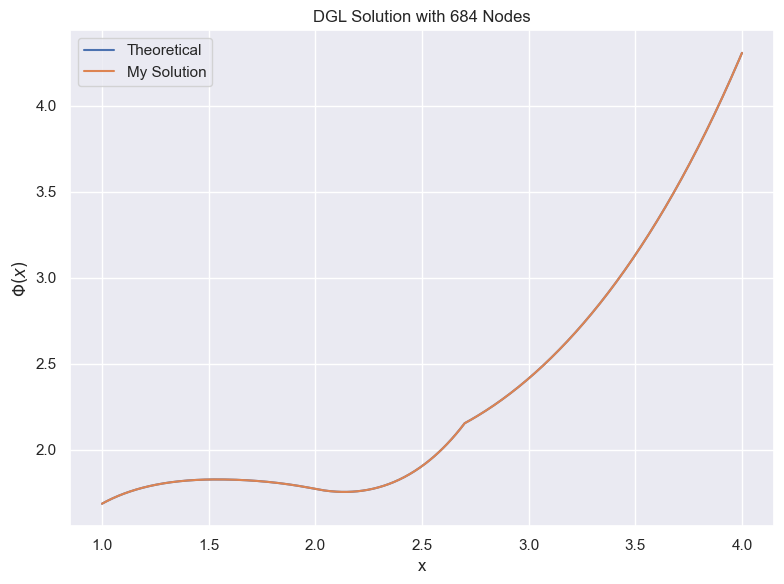

In [6]:
theoretical = np.loadtxt("Lösung/Netz1D_LoesungB.dat")
theoretical_df = myfunc.create_solution_df(nodes, theoretical)

solution_df = myfunc.create_solution_df(nodes, solution)


plt.figure(figsize=(8, 6))
plt.plot(theoretical_df["x"], theoretical_df["Phi"], label="Theoretical")
plt.plot(solution_df["x"], solution_df["Phi"], label="My Solution")

plt.xlabel("x")
plt.ylabel(r"$\Phi (x)$")
plt.title(f"DGL Solution with {number_of_nodes} Nodes")
plt.legend()

plt.tight_layout()
plt.show()

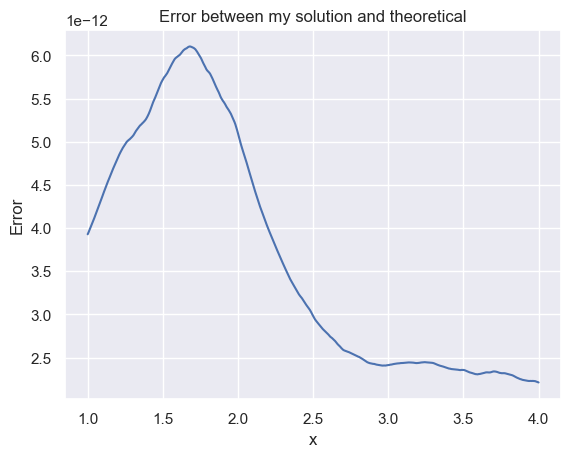

In [7]:
plt.plot(solution_df["x"], solution_df["Phi"]-theoretical_df["Phi"])
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error between my solution and theoretical")

plt.show()